In [124]:
from sklearn.datasets import load_wine
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [125]:
wine = load_wine()

In [126]:
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, random_state=42)



In [127]:
class KNN:
    def __init__(self, n_neighbor=3, weight=False):
        self.n_neighbor = n_neighbor
        self.weight = weight
        self.x = None
        self.y = None

    def training(self, x,  y):
        if x.shape[0] != y.shape[0]:
            raise f"error cannot fit with different size x ({x.shape[0]}) and y({y.shape[0]})"
        
        self.x = np.array(x)
        self.y = np.array(y)

    def predict(self, x_predict):
        distance = np.array([np.sum((x_train-x_predict)**2) for x_train in self.x])
        if self.weight:
            pass
        else:
            max_distance = np.argsort(distance)[:self.n_neighbor]
            label = [self.y[i] for i in max_distance]
            # print(np.argsort(distance))
            return int(self.voting(label))
        
    def voting(self, values):
        vote = {}
        for x in values:
            if x in vote:
                vote[str(x)] += 1
            else:
                vote[str(x)] = 1
        # print(vote)
        return max(vote, key=vote.get)

        
    def _predict(self, x_predict):
        predicted = []
        for x in x_predict:
            predicted.append(self.predict(x))
        return np.array(predicted)
        

In [128]:
testo = np.array(["t","e","tesd", "porsfs", "t", "t", "porsfs"])
# test1 = np.array([[9,3,8,1,2], [9,3,8,1,2]])

# np.un(testo)

In [129]:
knn = KNN(n_neighbor=3)

knn.training(X_train, y_train)

In [130]:
y_pred_train = knn.predict(X_test[13])


X_test[13], y_pred_train, y_test[13]

(array([ 12.77,   3.43,   1.98,  16.  ,  80.  ,   1.63,   1.25,   0.43,
          0.83,   3.4 ,   0.7 ,   2.12, 372.  ]),
 1,
 1)

In [131]:
y_pred_train = knn._predict(X_train)
y_pred_test = knn._predict(X_test)

In [132]:
X_test

array([[1.364000e+01, 3.100000e+00, 2.560000e+00, 1.520000e+01,
        1.160000e+02, 2.700000e+00, 3.030000e+00, 1.700000e-01,
        1.660000e+00, 5.100000e+00, 9.600000e-01, 3.360000e+00,
        8.450000e+02],
       [1.421000e+01, 4.040000e+00, 2.440000e+00, 1.890000e+01,
        1.110000e+02, 2.850000e+00, 2.650000e+00, 3.000000e-01,
        1.250000e+00, 5.240000e+00, 8.700000e-01, 3.330000e+00,
        1.080000e+03],
       [1.293000e+01, 2.810000e+00, 2.700000e+00, 2.100000e+01,
        9.600000e+01, 1.540000e+00, 5.000000e-01, 5.300000e-01,
        7.500000e-01, 4.600000e+00, 7.700000e-01, 2.310000e+00,
        6.000000e+02],
       [1.373000e+01, 1.500000e+00, 2.700000e+00, 2.250000e+01,
        1.010000e+02, 3.000000e+00, 3.250000e+00, 2.900000e-01,
        2.380000e+00, 5.700000e+00, 1.190000e+00, 2.710000e+00,
        1.285000e+03],
       [1.237000e+01, 1.170000e+00, 1.920000e+00, 1.960000e+01,
        7.800000e+01, 2.110000e+00, 2.000000e+00, 2.700000e-01,
        1.04

In [133]:
y_pred_test

array([2, 0, 2, 0, 1, 0, 1, 2, 0, 0, 2, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 2, 1, 2, 1, 0, 1, 0, 0, 1, 2, 0, 0, 0, 2, 2, 2, 2, 0, 1, 1, 2,
       2])

In [134]:
cm_train = confusion_matrix(y_train, y_pred_train)
cm_test = confusion_matrix(y_test, y_pred_test)

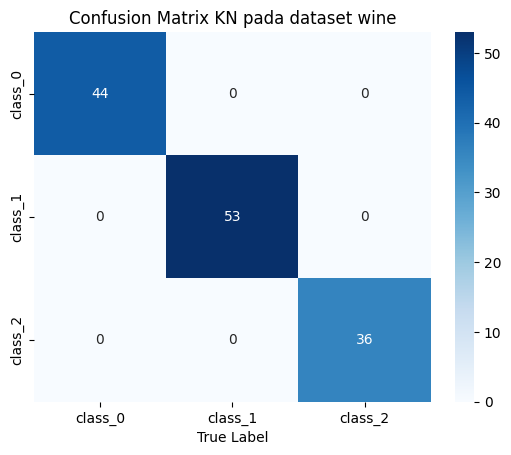

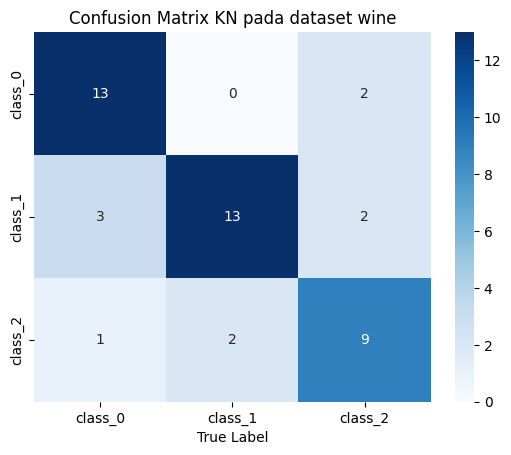

              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        44
     class_1       1.00      1.00      1.00        53
     class_2       1.00      1.00      1.00        36

    accuracy                           1.00       133
   macro avg       1.00      1.00      1.00       133
weighted avg       1.00      1.00      1.00       133

              precision    recall  f1-score   support

     class_0       0.76      0.87      0.81        15
     class_1       0.87      0.72      0.79        18
     class_2       0.69      0.75      0.72        12

    accuracy                           0.78        45
   macro avg       0.77      0.78      0.77        45
weighted avg       0.79      0.78      0.78        45



In [135]:
sns.heatmap(cm_train, annot=True, cmap="Blues", xticklabels=wine.target_names, yticklabels=wine.target_names)
plt.xlabel("Predicted Label")
plt.xlabel("True Label")
plt.title("Confusion Matrix KN pada dataset wine")
plt.show()

sns.heatmap(cm_test, annot=True, cmap="Blues", xticklabels=wine.target_names, yticklabels=wine.target_names)
plt.xlabel("Predicted Label")
plt.xlabel("True Label")
plt.title("Confusion Matrix KN pada dataset wine")
plt.show()

print(classification_report(y_train, y_pred_train, target_names=wine.target_names))
print(classification_report(y_test, y_pred_test, target_names=wine.target_names))

